In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
df = pd.read_csv ('datasets/survey_results_public.csv')
schema = pd.read_csv ('datasets/survey_results_schema.csv')

#### kategori rakam kontrolü yap.

In [96]:
#We see that there are lots of options. First we need to reduce to compare.
df["Gender"].value_counts(dropna=False)

Gender
Male                                                       31589
NaN                                                        16345
Female                                                      2600
Other                                                        225
Male; Other                                                  171
Gender non-conforming                                        160
Male; Gender non-conforming                                   65
Female; Transgender                                           56
Transgender                                                   55
Female; Gender non-conforming                                 29
Male; Female                                                  15
Transgender; Gender non-conforming                            15
Male; Female; Transgender; Gender non-conforming; Other       15
Male; Transgender                                             11
Female; Transgender; Gender non-conforming                     8
Male; Female; Tran

# Salary & Gender Correlation

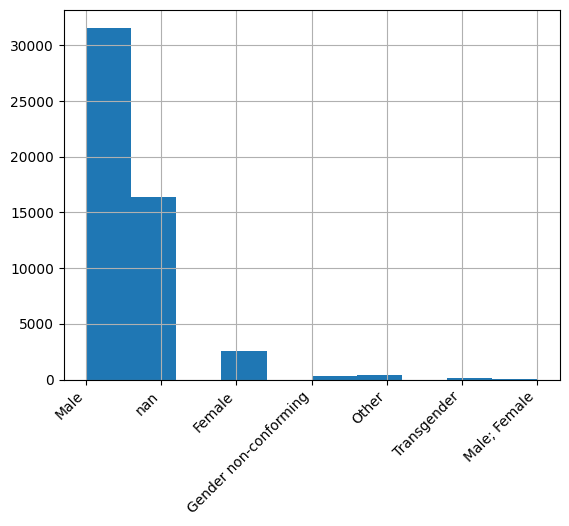

In [98]:
#df['Gender'] = df['Gender'].apply(lambda x: 'Other' if 'Other' in x else x)
# Değiştirmek istediğimiz terimleri ve hedef terimi belirliyoruz
terms_to_replace = ['Other', 'Gender non-conforming', 'non-conforming', 'Transgender']
replacement_terms = ['Other', 'Gender non-conforming', 'non-conforming', 'Transgender']

# Reduce Gender Column to analyze better
def replace_terms(text):
    if isinstance(text, str):
        for i, term in enumerate(terms_to_replace):
            if term in text:
                return replacement_terms[i]
                break
    return text
df_visualization = df.copy()
# Apply the replacement function to the Gender column
df['Gender'] = df['Gender'].apply(replace_terms)

#print(df_gender_dropped["Gender"].value_counts())
df['Gender'] = df['Gender'].fillna("nan")
# Create a histogram
df['Gender'].hist()

#Rotate X-labels to visualize better
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()
#df['Gender'].head()

It is obvious that males are dominant in the industry. 

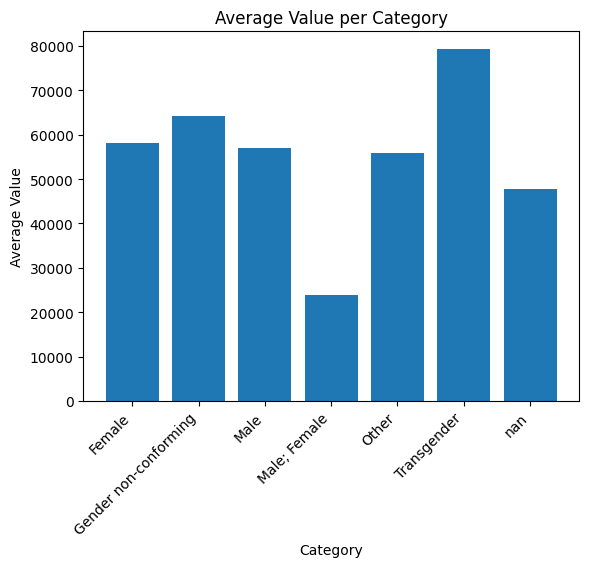

In [99]:
avg_values = df.groupby('Gender')['Salary'].mean()

# Create a bar plot
plt.bar(avg_values.index, avg_values)
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.title('Average Value per Category')
plt.show()

Now, we have distribution but we can see that the average value of females is higher than males yet the difference is not significant. Highest salary is for transgenders. It seems little bit missing. How about Nan values in Salary?

In [100]:
df['Gender'] = df['Gender'].replace("nan", df['Gender'].mode()[0])
df = df[df.Gender != "Male; Female"]

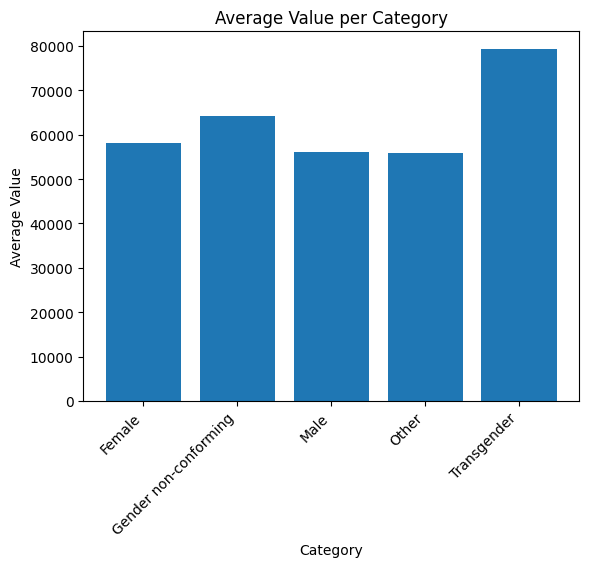

In [101]:
avg_values = df.groupby('Gender')['Salary'].mean()

# Create a bar plot
plt.bar(avg_values.index, avg_values)
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.title('Average Value per Category')
plt.show()

We can say that nan values have almost no effect on average values. But do we know anything about employment status?

In [102]:
df["EmploymentStatus"].astype("category")

0        Not employed, and not looking for work
1                            Employed part-time
2                            Employed full-time
3                            Employed full-time
4                            Employed full-time
                          ...                  
51387                        Employed full-time
51388                        Employed full-time
51389                        Employed full-time
51390                        Employed full-time
51391                        Employed full-time
Name: EmploymentStatus, Length: 51377, dtype: category
Categories (7, object): ['Employed full-time', 'Employed part-time', 'I prefer not to say', 'Independent contractor, freelancer, or self-e..., 'Not employed, and not looking for work', 'Not employed, but looking for work', 'Retired']

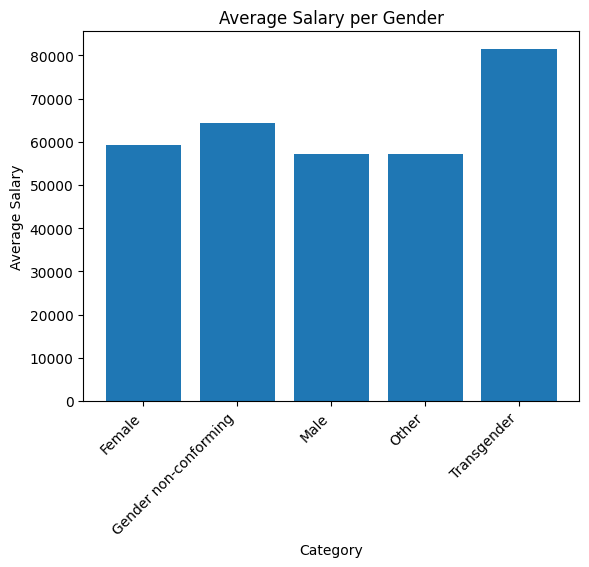

In [103]:
er_df = df.dropna(subset=['Salary'])

part_df = er_df[er_df['EmploymentStatus'] == 'Employed full-time']
avg_values = part_df.groupby('Gender')['Salary'].mean()

# Create a bar plot
plt.bar(avg_values.index, avg_values)

plt.xlabel('Category')

plt.ylabel('Average Salary')

plt.xticks(rotation=45, ha='right')

plt.title('Average Salary per Gender')

plt.show()


How about Expected Salaries?

In [105]:
print(df.loc['Salary','ExpectedSalary'])
avg_values = df.groupby('Gender')['ExpectedSalary'].mean()

# Create a bar plot
plt.bar(avg_values.index, avg_values)
plt.xlabel('Category')
plt.ylabel('Average Expected Salary')
plt.xticks(rotation=45, ha='right')
plt.title('Average Expected Salary per Gender')
plt.show()

KeyError: 'Salary'

What about the gap between desired Salaries?

In [ ]:
# NaN içeren satırları kaldır
#df_cleaned = df.dropna(subset=['ExpectedSalary', 'Salary'])
df.loc[['Salary','ExpectedSalary']]

# "gap" sütununu oluştur ve istenen hesaplamayı yap
#df_cleaned['gap'] = df_cleaned['ExpectedSalary'] - df_cleaned['Salary']

#df_cleaned.groupby("Gender")["gap"].mean()


KeyError: "None of [Index(['Salary', 'ExpectedSalary'], dtype='object')] are in the [index]"

IndexError: index 0 is out of bounds for axis 0 with size 0

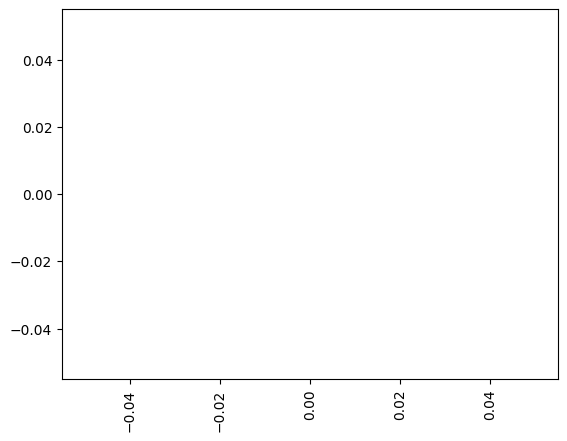

In [ ]:
# Group by Gender and calculate the sum of the gap
avg_values = df_na.groupby('Gender')['gap'].mean()

# Create a bar plot
avg_values.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Total Gap')
plt.xticks(rotation=45, ha='right')
plt.title('Total Gap between ExpectedSalary and Salary by Gender')
plt.show()